---

# 4. Machine Learning with Python 5 (Project 5, Support Vector Machines)

# Goal: 

## Classification of human cells as benign or malignant for cancer diagnosis.

# _00. Import Main Libraries_

# _01. Load the Data and Explore the Basics of It_

# _02. Plot the Selected Data_

# _03. Data Preprocessing_

# _04. Modelling (svm) and Training_

# _05. Evaluation_

---
---
---

# _00. Import Main Libraries_

In [29]:
import pandas as pd
import numpy as np
import pylab as pl
import scipy.optimize as opt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline 

# _01. Load the Data and Explore the Basics of It_

In [30]:
df = pd.read_csv("cell_samples.csv")

df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# _02. Plot the Selected Data_

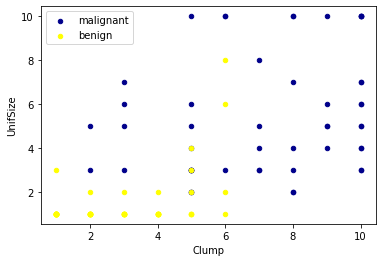

In [31]:
# plot

ax = df[df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='malignant')

df[df['Class'] == 2][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Yellow', label='benign', ax=ax)

plt.show()

# _03. Data Preprocessing_

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [33]:
# deal with the non-numeric values

df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           683 non-null    int64 
 1   Clump        683 non-null    int64 
 2   UnifSize     683 non-null    int64 
 3   UnifShape    683 non-null    int64 
 4   MargAdh      683 non-null    int64 
 5   SingEpiSize  683 non-null    int64 
 6   BareNuc      683 non-null    object
 7   BlandChrom   683 non-null    int64 
 8   NormNucl     683 non-null    int64 
 9   Mit          683 non-null    int64 
 10  Class        683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [60]:
# seperate X and y

X_data = df.drop(['ID','Class'],axis=1)

y_data = df[["Class"]]

In [61]:
# apply train-test split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0)

print ('Train set shape:', X_train.shape,  y_train.shape)

print ('Test set shape:', X_test.shape,  y_test.shape)

Train set shape: (546, 9) (546, 1)
Test set shape: (137, 9) (137, 1)


# _04. Modelling (svm) and Training_

In [36]:
# Kernel Function choice:

# 1.Linear
# 2.Polynomial
# 3.Radial basis function (RBF)   (this is chosen for this project)
# 4.Sigmoid

In [62]:
from sklearn import svm

rbF = svm.SVC(kernel='rbf')

rbF.fit(X_train, y_train.Class) 

SVC()

In [63]:
yTestHat = rbF.predict(X_test)

In [64]:
yTestHat

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2], dtype=int64)

# 05. _Evaluation_

# a) Accuracy Score and Jaccard Index

In [104]:
# accuracy score

from sklearn.metrics import accuracy_score

accuracy_score(y_test, yTestHat)

0.9635036496350365

In [105]:
# jaccard score

from sklearn.metrics import jaccard_score

jaccard_score(y_test, yTestHat, average=None)

array([0.94, 0.91])

# b) f1 Score

In [107]:
# f1 score

from sklearn.metrics import f1_score

f1_score(y_test, yTestHat, average='weighted') 

0.9637150064588158

# c) Confusion Matrix and Plot

In [83]:
from sklearn.metrics import classification_report, confusion_matrix

import itertools

In [68]:
# function for confusion matrix and its plot

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [77]:
# show confusion matrix and some details

print (classification_report(y_test, yTestHat))

              precision    recall  f1-score   support

           2       0.99      0.95      0.97        87
           4       0.92      0.98      0.95        50

    accuracy                           0.96       137
   macro avg       0.96      0.97      0.96       137
weighted avg       0.96      0.96      0.96       137



Confusion matrix, without normalization
[[83  4]
 [ 1 49]]


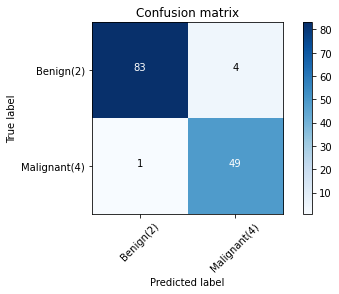

In [80]:
# plot the matrix

cnf_matrix = confusion_matrix(y_test, yTestHat, labels=[2,4])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')
plt.show()